In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
%matplotlib inline
ipos = pd.read_csv(r'ipo_data.csv',encoding='latin-1')
ipos

,Date,Issuer,Symbol,Lead/Joint-lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,3/2/16,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,$24.00,$28.97,$28.32,18.00%,$4.97,$4.32,3,NaN
1,3/2/16,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,$16.00,$18.00,$18.20,13.75%,$2.00,$2.20,2,NaN
2,11/2/16,AveXis,AVXS,Goldman Sachs/ Jefferies,$20.00,$18.02,$18.05,-9.75%,($1.98),($1.95),2,Missed
3,11/2/16,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,$8.00,$8.00,$6.64,-17.00%,$0.00,($1.36),1,NaN
4,2/24/16,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,$10.00,$10.01,$10.21,2.10%,$0.01,$0.21,1,NaN
5,3/3/16,Jensyn Acquisition,JSYNU,Chardan Capital Markets,$10.00,$9.95,$9.95,-0.50%,($0.05),($0.05),1,NaN
6,3/3/16,Syndax Pharmaceuticals,SNDX,Morgan Stanley/ Citigroup,$12.00,$12.11,$12.01,0.08%,$0.11,$0.01,1,NaN
7,11/3/16,KLR Energy Acquisition,KLREU,EarlyBirdCapital,$10.00,$10.00,$10.00,0.00%,$0.00,$0.00,1,NaN
8,3/22/16,Corvus Pharmaceuticals,CRVS,Credit Suisse/ Cowen and Company,$15.00,$15.00,$14.25,-5.00%,$0.00,($0.75),1,NaN
9,7/4/16,Aeglea BioTherapeutics,AGLE,UBS Investment Bank/ BMO Capital Markets/ Well...,$10.00,$10.40,$9.77,-2.30%,$0.40,($0.23),1,NaN


In [2]:
ipos = ipos.applymap(lambda x: x if not '$' in str(x) else
x.replace('$',''))
ipos = ipos.applymap(lambda x: x if not '%' in str(x) else
x.replace('%',''))
ipos = ipos.applymap(lambda x: x if not '(' in str(x) else
x.replace('(',''))
ipos = ipos.applymap(lambda x: x if not ')' in str(x) else
x.replace(')',''))
ipos

,Date,Issuer,Symbol,Lead/Joint-lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,3/2/16,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN
1,3/2/16,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN
2,11/2/16,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2,Missed
3,11/2/16,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1,NaN
4,2/24/16,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN
5,3/3/16,Jensyn Acquisition,JSYNU,Chardan Capital Markets,10.00,9.95,9.95,-0.50,0.05,0.05,1,NaN
6,3/3/16,Syndax Pharmaceuticals,SNDX,Morgan Stanley/ Citigroup,12.00,12.11,12.01,0.08,0.11,0.01,1,NaN
7,11/3/16,KLR Energy Acquisition,KLREU,EarlyBirdCapital,10.00,10.00,10.00,0.00,0.00,0.00,1,NaN
8,3/22/16,Corvus Pharmaceuticals,CRVS,Credit Suisse/ Cowen and Company,15.00,15.00,14.25,-5.00,0.00,0.75,1,NaN
9,7/4/16,Aeglea BioTherapeutics,AGLE,UBS Investment Bank/ BMO Capital Markets/ Well...,10.00,10.40,9.77,-2.30,0.40,0.23,1,NaN


In [3]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 12 columns):
Date                       2545 non-null object
Issuer                     2545 non-null object
Symbol                     2545 non-null object
Lead/Joint-lead Manager    2545 non-null object
Offer Price                2545 non-null object
Opening Price              2545 non-null object
1st Day Close              2545 non-null object
1st Day % Px Chng          2545 non-null object
$ Chg Opening              2545 non-null object
$ Chg Close                2545 non-null object
Star Ratings               2545 non-null object
Performed                  286 non-null object
dtypes: object(12)
memory usage: 238.7+ KB


In [4]:
ipos[ipos['Date']=='11/120']

ipos.loc[917, 'Date'] = pd.to_datetime('2012-11-20')

In [5]:
ipos.replace('N/C',0, inplace=True)
ipos['Date'] = pd.to_datetime(ipos['Date'])
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['1st Day % Px Chng'] = ipos['1st Day % Px Chng'].astype('float')
ipos['$ Chg Close'] = ipos['$ Chg Close'].astype('float')
ipos['$ Chg Opening'] = ipos['$ Chg Opening'].astype('float')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

In [6]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 12 columns):
Date                       2545 non-null datetime64[ns]
Issuer                     2545 non-null object
Symbol                     2545 non-null object
Lead/Joint-lead Manager    2545 non-null object
Offer Price                2545 non-null float64
Opening Price              2545 non-null float64
1st Day Close              2545 non-null float64
1st Day % Px Chng          2545 non-null float64
$ Chg Opening              2545 non-null float64
$ Chg Close                2545 non-null float64
Star Ratings               2545 non-null int64
Performed                  286 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 238.7+ KB


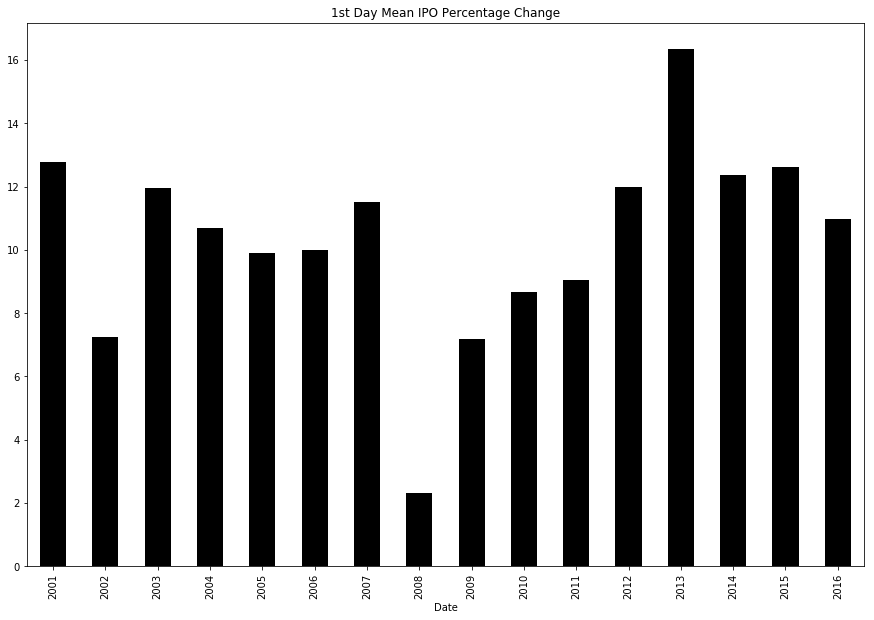

In [7]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng']\
.mean().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Mean IPO Percentage Change')

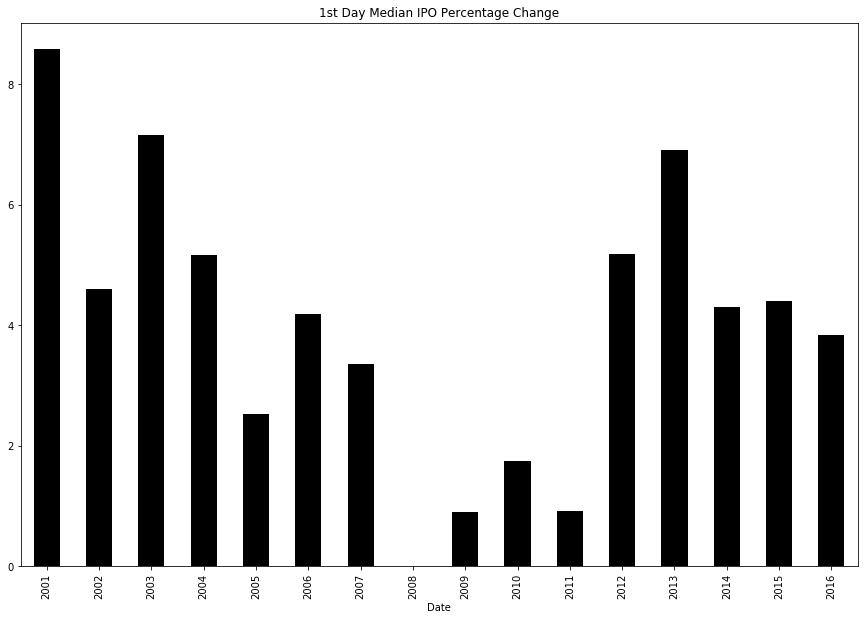

In [8]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng']\
.median().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Median IPO Percentage Change')

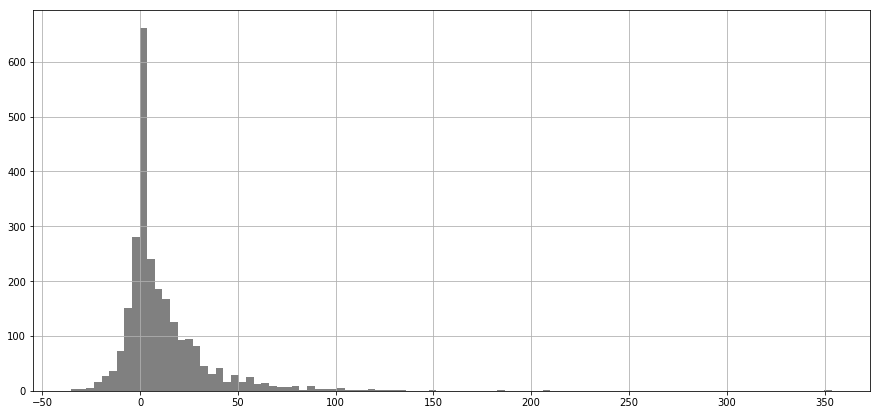

In [9]:
ipos['1st Day % Px Chng'].hist(figsize=(15,7), bins=100, color='grey')

In [10]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [11]:
ipos

,Date,Issuer,Symbol,Lead/Joint-lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
0,2016-03-02,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN,-0.65,-2.243700
1,2016-03-02,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN,0.20,1.111111
2,2016-11-02,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2,Missed,-0.03,-0.166482
3,2016-11-02,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1,NaN,1.36,17.000000
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN,0.20,1.998002
5,2016-03-03,Jensyn Acquisition,JSYNU,Chardan Capital Markets,10.00,9.95,9.95,-0.50,0.05,0.05,1,NaN,0.00,0.000000
6,2016-03-03,Syndax Pharmaceuticals,SNDX,Morgan Stanley/ Citigroup,12.00,12.11,12.01,0.08,0.11,0.01,1,NaN,-0.10,-0.825764
7,2016-11-03,KLR Energy Acquisition,KLREU,EarlyBirdCapital,10.00,10.00,10.00,0.00,0.00,0.00,1,NaN,0.00,0.000000
8,2016-03-22,Corvus Pharmaceuticals,CRVS,Credit Suisse/ Cowen and Company,15.00,15.00,14.25,-5.00,0.00,0.75,1,NaN,0.75,5.000000
9,2016-07-04,Aeglea BioTherapeutics,AGLE,UBS Investment Bank/ BMO Capital Markets/ Well...,10.00,10.40,9.77,-2.30,0.40,0.23,1,NaN,-0.17,-1.634615


In [12]:
ipos['% Chg Open to Close'].describe()

count    2545.000000
mean        1.978708
std         9.229963
min      -106.601942
25%        -1.510177
50%         0.545455
75%         4.761905
max       113.333333
Name: % Chg Open to Close, dtype: float64

In [13]:
ipos[ipos['% Chg Open to Close']<-98]

,Date,Issuer,Symbol,Lead/Joint-lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
259,2015-11-20,Duluth Holdings,DLTH,William Blair/ Baird/ Raymond James/ BMO Capit...,12.0,5.15,13.36,11.33,6.85,1.36,1,NaN,-5.49,-106.601942
1877,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.09,6.22,3.67,6.22,0.22,1,NaN,-6.00,-98.522167


In [14]:
ipos[ipos['Date']>='2015-01-01']['$ Chg Open to Close'].describe()

count    263.000000
mean       0.358669
std        2.115906
min       -6.160000
25%       -0.300000
50%        0.050000
75%        0.740000
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [15]:
# ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
# ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [16]:
# ipos['% Chg Open to Close'].describe()